In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import seaborn as sns

from documents import Document, Corpus, Sentence
%load_ext autoreload
%autoreload 2

In [2]:
# Instantiate a corpus object which reads in all .txt files in a directory
path_to_writing_folder = "/Users/mbarry/Documents/03_hobbies/writing/prose/essays"
corpus = Corpus(path_to_writing_folder)

There are 55 documents in the corpus
There are 27023 words in the corpus


In [3]:
print(f"There are {corpus.document_count} documents in the corpus")

There are 55 documents in the corpus


# Tokenizing the corpus and counting words

In [4]:
corpus.tokenize_corpus()

all_words = FreqDist(corpus.document_tokens)
all_words.most_common(10)

[('i', 2375),
 ('to', 969),
 ('the', 815),
 ('a', 646),
 ('that', 566),
 ('of', 487),
 ('my', 470),
 ('was', 449),
 ('it', 412),
 ('and', 410)]

In [5]:
# View most common words without stop words
corpus.tokenize_corpus(remove_stop_words=True)
all_words = FreqDist(corpus.document_tokens)
all_words.most_common(10)

[('feel', 182),
 ('like', 160),
 ('would', 138),
 ('able', 114),
 ('good', 108),
 ('life', 95),
 ('really', 95),
 ('think', 83),
 ('way', 82),
 ('father', 81)]

In [6]:
document_lengths = [len(doc) for doc in corpus.documents.values()]


(array([40.,  7.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    0. ,  2586.9,  5173.8,  7760.7, 10347.6, 12934.5, 15521.4,
        18108.3, 20695.2, 23282.1, 25869. ]),
 <BarContainer object of 10 artists>)

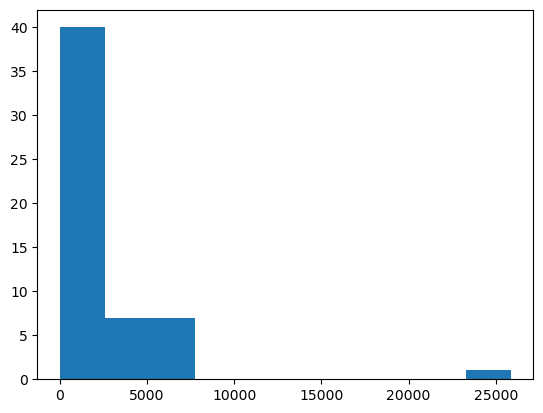

In [7]:
fig, ax = plt.subplots()
ax.hist(document_lengths)

# Sentences 

In [35]:
example_sentence = "This is an example sentence, with a comma."

sentence = Sentence(example_sentence)

In [36]:
# The sentence class creates a list of tokens
sentence.word_tokens

['This', 'is', 'an', 'example', 'sentence', 'with', 'a', 'comma']

In [37]:
# All punctuation are stored in the punctuation mark list
sentence.punctuation_marks

[',', '.']

In [38]:
# Type of sentence is determined by the last punctuation mark
sentence.type_of_sentence

'declarative'

## Sentence Sentiment


In [40]:
# NLTK Vader sentence score between -1 (negative) and +1 (positive)
sentence.sentiment_score

0.0772

In [44]:
happy_string = "I am so happy!"
happy_sentence = Sentence(happy_string)
print(f"The sentiment of the happy sentence is: {happy_sentence.sentiment_score}")


The sentiment of the happy sentence is: 0.6468


In [45]:
sad_string = "I am so sad!"
sad_sentence = Sentence(sad_string)
print(f"The sentiment of the sad sentence is: {sad_sentence.sentiment_score}")

The sentiment of the sad sentence is: -0.5697


# Document Class

In [85]:
path_to_journal = "../writing/sample_journal.txt"
document = Document(path_to_journal)

The document class reads in the document in it's entirety and stores it in the document_string attribute.

In [86]:
document.document_string

"# March 5th, 2023  I am excited about the Sentence class I coded today.  It seems like it could be a useful tool to help writers explore granular aspects of their writing. It is fun making choices about what parts of a sentence are important, and what attributes a Sentence class should have.  I am a bit worried that I am overengineering this project.  Even if it is, it is good practice in organization.  It is interesting to think about natural language components as Python objects.  # March 8th, 2023  I am excited about having a set of classes that inherit the properties of the Document class.  I will have a journal class which has time-based sentiment analysis.  I will have an essay class which will have a property of a document length goal, as well as a method to identify repeated phrases and ideas.  I will have a poem class which describes number of lines, and perhaps common phonemes.  I wonder if I am actually going to finish this project, or at least get an MVP completed.  I have

On instantiation, the document object creates sentence objects which allow for easy exploration of the word attributes.

In [87]:
document.sentences[0].sentence_string

'# March 5th, 2023  I am excited about the Sentence class I coded today.'

## Document Length 

In [88]:
print(f"There are {document.word_count} words in the document")


There are 361 words in the document


# Cumulative Count

The cumulative_word_count() function returns a list which counts the number of new words added as the document grows.  

The larger the document, the smaller the slope will be, since it is a higher probabilty that each successive word added will have been already used in the document.

The changes in the slope of the graph may give a sense of where new ideas are introduced.

In [89]:
cumulative_word_count = document.cumulative_word_count()

Text(0, 0.5, 'Count of New Words')

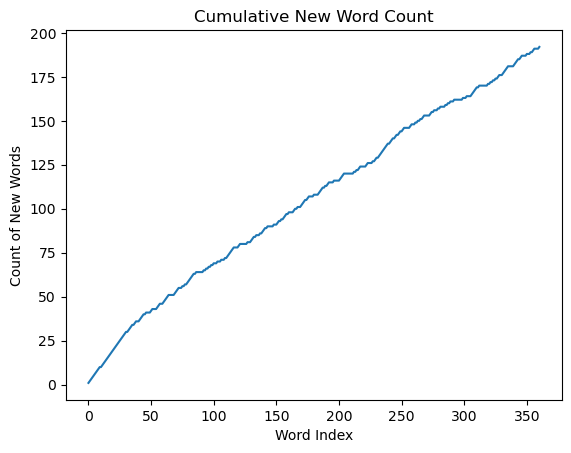

In [90]:
fig, ax = plt.subplots()

ax.plot(
    range(len(cumulative_word_count)),
    cumulative_word_count
)

ax.set_title("Cumulative New Word Count")
ax.set_xlabel("Word Index")
ax.set_ylabel("Count of New Words")

## Sentiment Over Time

In [92]:
cumulative_sentiment = document.cumulative_sentiment()

Text(0, 0.5, 'VADER Sentiment Score')

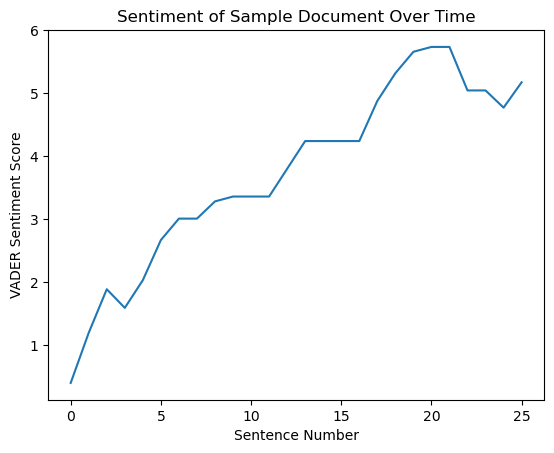

In [93]:
fig, ax = plt.subplots()

ax.plot(range(document.sentence_count), cumulative_sentiment)
ax.set_title("Sentiment of Sample Document Over Time")
ax.set_xlabel("Sentence Number")
ax.set_ylabel("VADER Sentiment Score")